In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import mne
import pylsl

import PyQt5

import sys
sys.path.append(r"C:\Users\jt25h\App-SigVisualizer-master")

from pylsl import StreamInlet, resolve_streams

from IPython.display import display, clear_output

In [2]:

from pylsl import resolve_streams

# Find all available streams
streams = resolve_streams()

# Print details of each stream found
for i, stream in enumerate(streams):
    print(f"Stream {i + 1}:")
    print(f"  Name: {stream.name()}")
    print(f"  Type: {stream.type()}")
    print(f"  Source ID: {stream.source_id()}")
    print(f"  Channels: {stream.channel_count()}")
    print(f"  Sampling Rate: {stream.nominal_srate()} Hz")
    print()

inlet = StreamInlet(streams[0])


Stream 1:
  Name: Neuroeducation EEG
  Type: EEG
  Source ID: neuroEdu_psy-pdb-a403l
  Channels: 19
  Sampling Rate: 250.0 Hz



In [3]:
from PyQt5.QtCore import QThread
class TestThread(QThread):
    def run(self):
        print("Thread running")

thread = TestThread()
thread.start()

Thread running


In [5]:
# paintwidget.py (inside update_streams, after self.streams is filled)
# paintwidget.py → DataThread.update_streams
%gui qt
import sys
sys.path.append(r"C:\Users\jt25h\testing_learning\App-SigVisualizer-master")

from sigvisualizer import SigVisualizer
win = SigVisualizer()
win.show()

# Now reach into the running DataThread and change its parameters
dt = win.ui.widget.dataTr
dt.seconds_per_screen = 5
dt.chunksPerScreen = 25



In [6]:
%gui qt
import sys
sys.path.append(r"C:\Users\jt25h\testing_learning\App-SigVisualizer-master")

from sigvisualizer import SigVisualizer
win = SigVisualizer()
win.show()

# Grab the running DataThread
dt = win.ui.widget.dataTr

# Adjust parameters on the fly
dt.seconds_per_screen = 5
dt.chunksPerScreen    = 25


: 

In [2]:
%gui qt
import sys
sys.path.append(r"C:\Users\jt25h\testing_learning\App-SigVisualizer-master")

from sigvisualizer import SigVisualizer
win = SigVisualizer()
win.show()

# Grab the running DataThread
dt = win.ui.widget.dataTr

# Adjust parameters on the fly
dt.seconds_per_screen = 5
dt.chunksPerScreen    = 25


ImportError: 
    Importing PyQt5 disabled by IPython, which has
    already imported an Incompatible QT Binding: pyside6
    

In [4]:

self.streams = pylsl.resolve_streams(wait_time=3.0)


preferred = "EEG"
names = [s.name() for s in self.streams]
if preferred in names:
    self.sig_strm_idx = names.index(preferred)


NameError: name 'self' is not defined

In [4]:
from pylsl import resolve_streams
print([ (s.name(), s.type(), s.channel_count(), s.nominal_srate()) 
        for s in resolve_streams(wait_time=2.0) ])


[('MarkerStream', 'Markers', 1, 0.0), ('Neuroeducation EEG', 'EEG', 19, 250.0)]


In [8]:
%gui qt
import sys
sys.path.append(r"C:\Users\jt25h\testing_learning\App-SigVisualizer-master")

from sigvisualizer import SigVisualizer   # this is the main window class
win = SigVisualizer()
win.show()


In [7]:
%gui qt

import sys
sys.path.append(r"C:\Users\jt25h\testing_learning\App-SigVisualizer-master")

from sigvisualizer.viewer import SigVisualizer  # module path may differ
viewer = SigVisualizer()      # pass any args if needed
viewer.show()


ModuleNotFoundError: No module named 'sigvisualizer.viewer'; 'sigvisualizer' is not a package

In [5]:

%gui qt
!python C:\Users\jt25h\testing_learning\App-SigVisualizer-master\sigvisualizer.py

2025-08-29 15:51:26.591 (   3.048s) [        194116A6]      netinterfaces.cpp:36    INFO| netif '{738A536F-0732-4218-A9BC-A6F85F1C31A5}' (status: 1, multicast: 1
2025-08-29 15:51:26.591 (   3.049s) [        194116A6]      netinterfaces.cpp:58    INFO| 	IPv6 ifindex 6
2025-08-29 15:51:26.591 (   3.049s) [        194116A6]      netinterfaces.cpp:36    INFO| netif '{74181DAB-17E6-4BE5-8CE9-A6B506C17701}' (status: 2, multicast: 1
2025-08-29 15:51:26.592 (   3.049s) [        194116A6]      netinterfaces.cpp:36    INFO| netif '{79B5D82F-E867-493A-A549-8D4FE77595C8}' (status: 2, multicast: 1
2025-08-29 15:51:26.592 (   3.049s) [        194116A6]      netinterfaces.cpp:36    INFO| netif '{A32C7133-760F-4795-BE45-5A3BAC0ADED1}' (status: 2, multicast: 1
2025-08-29 15:51:26.592 (   3.050s) [        194116A6]      netinterfaces.cpp:36    INFO| netif '{2403CA2A-4C78-4CBA-9D29-67AB797DC12F}' (status: 2, multicast: 1
2025-08-29 15:51:26.592 (   3.050s) [        194116A6]      netinterfaces.cpp:36    

### something else --


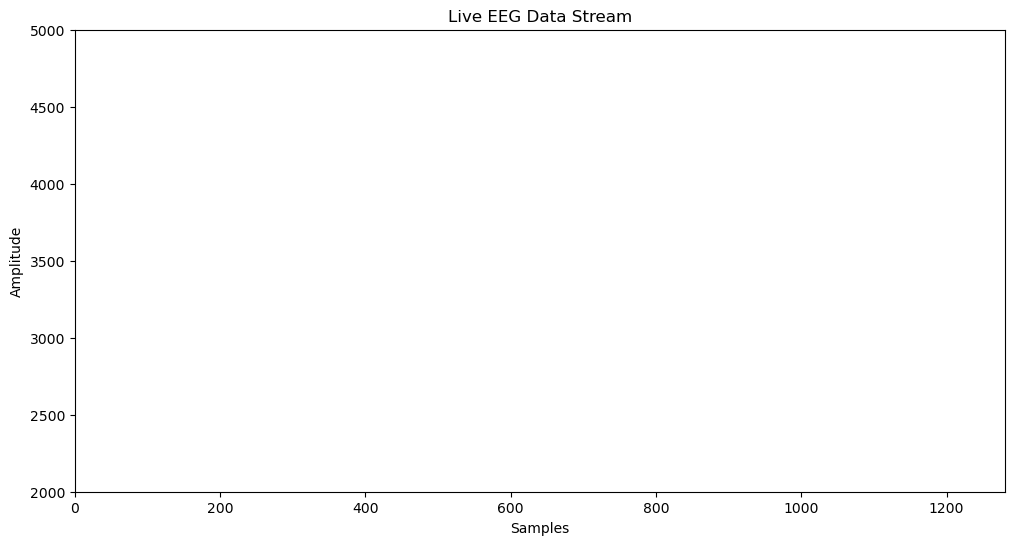

1


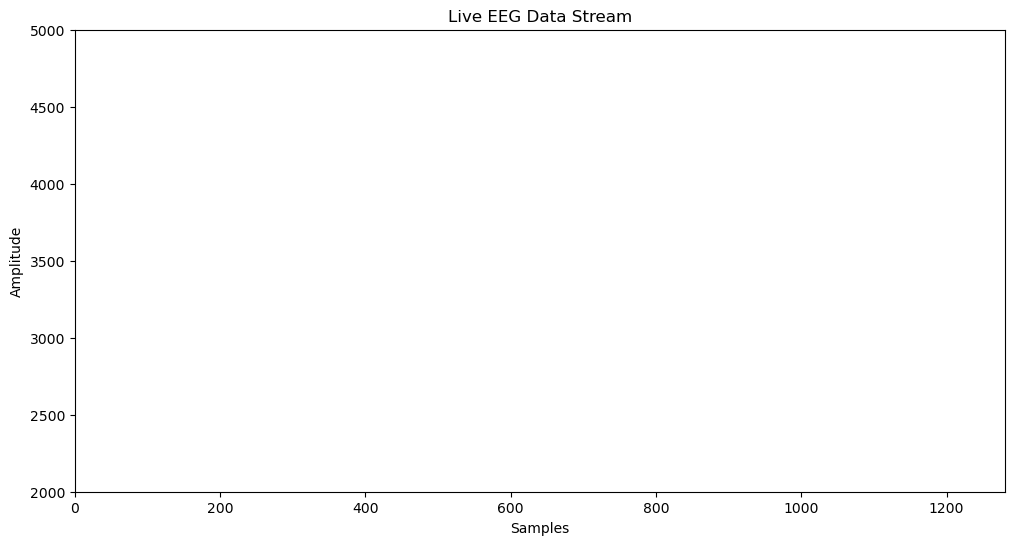

2


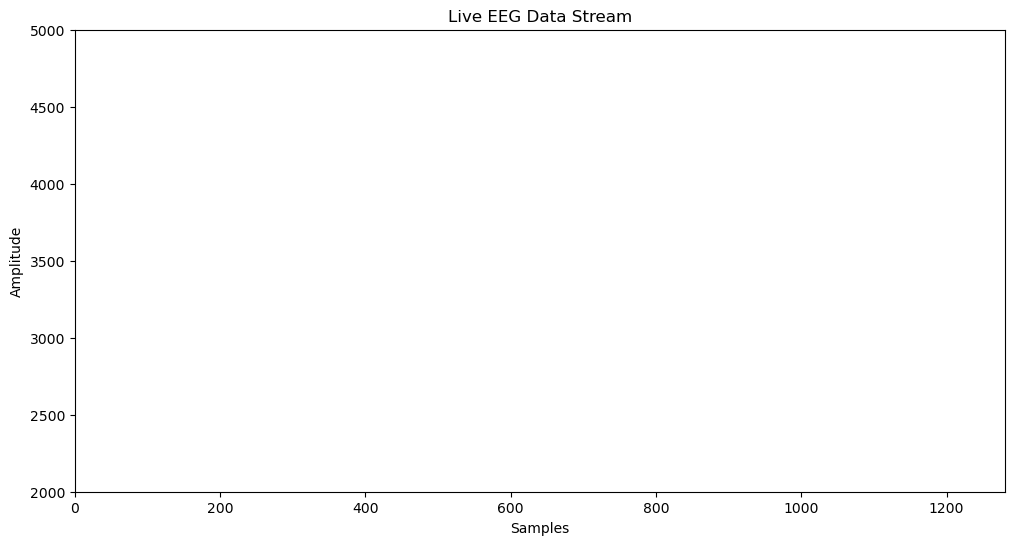

3


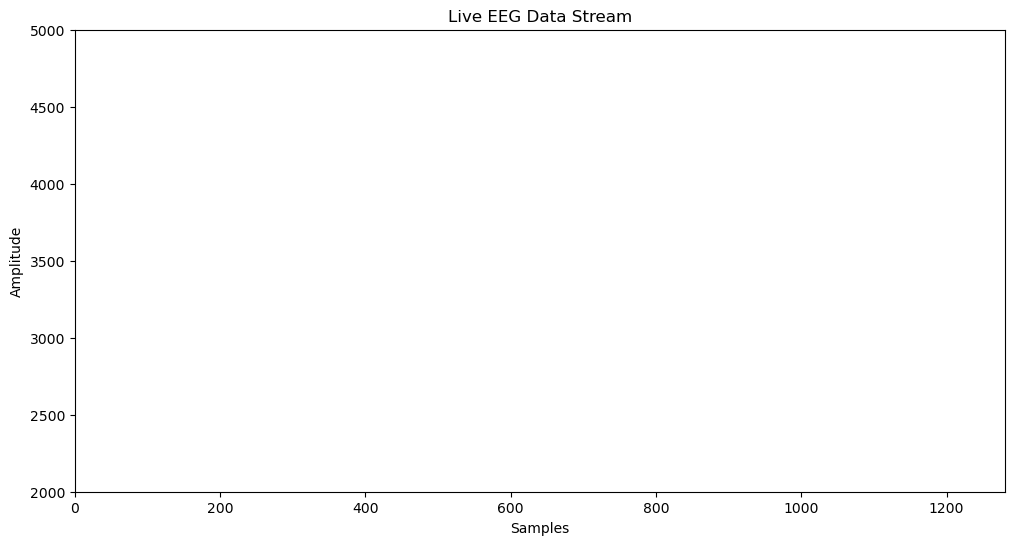

4


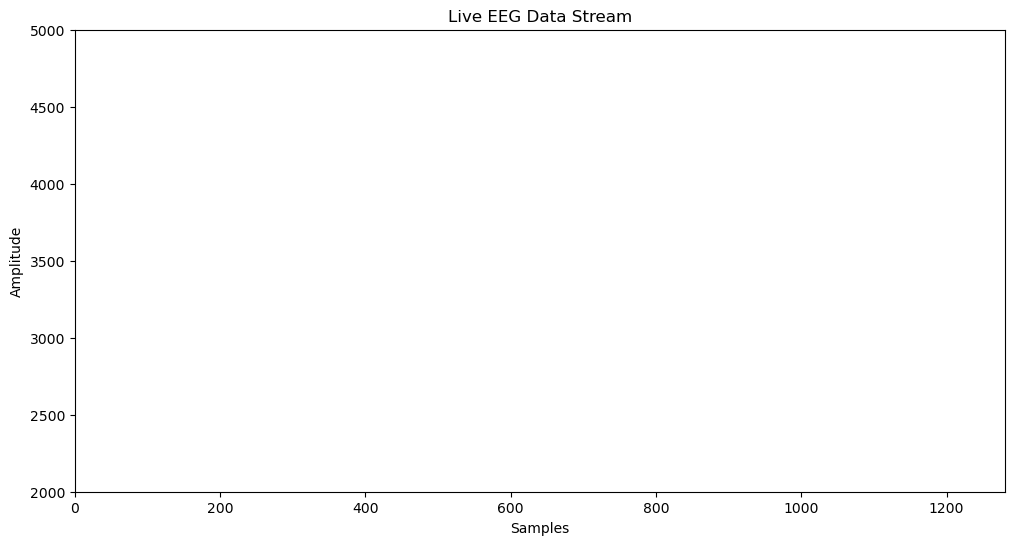

5


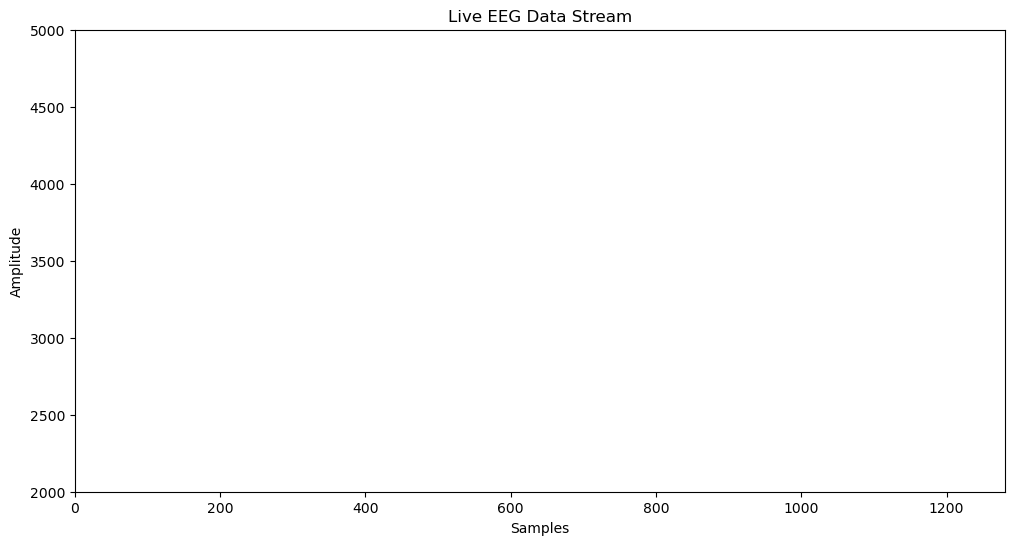

6


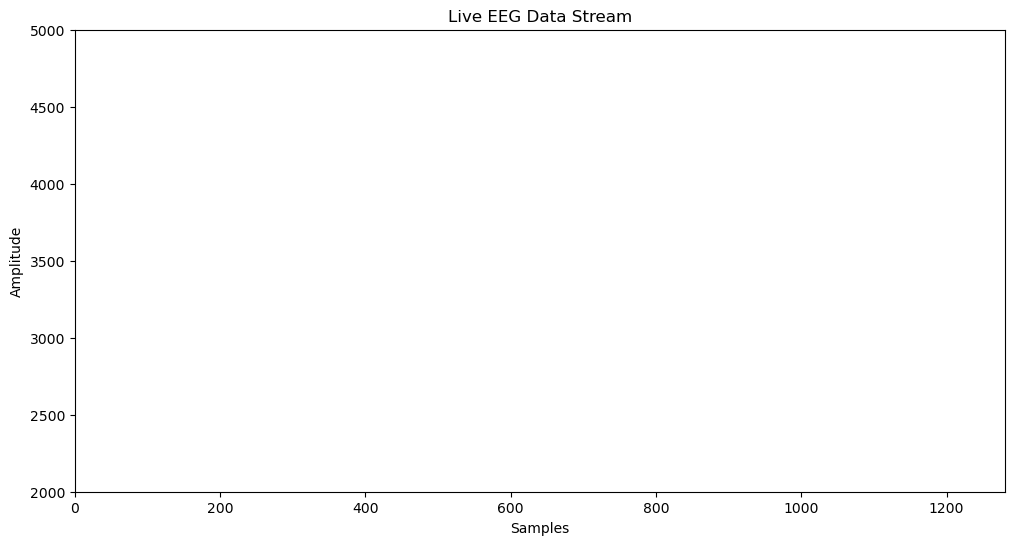

7
Streaming stopped.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time
from pylsl import StreamInlet, resolve_streams

# Resolve and open the LSL stream
streams = resolve_streams()
inlet = StreamInlet(streams[0])

# Parameters
sampling_rate = 256  # samples per second
window_length = 5    # seconds
buffer_size = sampling_rate * window_length  # 1280 samples for 5 seconds at 256 Hz

# Buffer for holding the last 5 seconds of data
data_buffer = np.zeros(buffer_size)

# Set up the plot
start_time = time.time()
elapsed_time = time.time() - start_time

x = 0
try:
    while True:

        time.sleep(max(0, 5.0 - elapsed_time))
        # Pull samples for 1 second
        new_data = []
        for _ in range(buffer_size):  # 256 samples per second
            sample, _ = inlet.pull_sample()
            new_data.append(sample[0])  # Assuming single-channel data; adjust for multi-channel

        # Update the buffer with new data, shifting older data out
        data_buffer = np.roll(data_buffer, -buffer_size)
        data_buffer[-buffer_size:] = np.array(new_data).flatten()
        fig, ax = plt.subplots(figsize=(12, 6))
        line, = ax.plot(data_buffer)
        ax.set_ylim(2000, 5000)  # Adjust y-axis limits as needed based on signal range
        ax.set_title("Live EEG Data Stream")
        ax.set_xlabel("Samples")
        ax.set_ylabel("Amplitude")
        # Update the plot with the new buffer data
        line.set_ydata(data_buffer)

        ax.set_xlim(0, buffer_size)  # Adjust the x-axis range
        plt.pause(0.001)  # Small pause to update the plot

        # Maintain a 1-second loop interval
        elapsed_time = time.time() - start_time
        x = x+1
        print(x)
        

except KeyboardInterrupt:
    print("Streaming stopped.")

# Close plot on exit
plt.show()
